In [ ]:
!pip install fastai==2.5.3 kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download pnevmoniya

 98% 1.12G/1.14G [00:09<00:00, 144MB/s]
100% 1.14G/1.14G [00:09<00:00, 130MB/s]


In [ ]:
! unzip pnevmoniya.zip

In [ ]:
import torch  
import fastai
import os 
import shutil
import random
import pandas as pd
print(torch.__version__)
print(fastai.__version__)

from fastai.vision.all import *

1.10.2+cu102
2.5.3


In [ ]:
print(len(os.listdir("/content/train/NORMAL")))
print(len(os.listdir("/content/train/PNEUMONIA")))

1341
3875


In [ ]:
p_list = os.listdir('/content/train/PNEUMONIA')

In [ ]:
virus = []
bacteria = []
for i in range(len(p_list)):
  if p_list[i][11:14] == 'iru' or p_list[i][11:14] == 'vir':
    virus.append(p_list[i])
  else:
    bacteria.append(p_list[i])

In [ ]:
len(virus)

1317

In [ ]:
len(bacteria)

2558

In [ ]:
for i in bacteria:
  src = f'/content/train/PNEUMONIA/{i}'
  des = '/content/train/BACTERIA'
  shutil.move(src, des)

for i in virus:
  src = f'/content/train/PNEUMONIA/{i}'
  des = '/content/train/VIRUS'
  shutil.move(src, des)

os.rmdir('/content/train/PNEUMONIA')

In [ ]:
path = Path('/content/train')
path.ls()

(#4) [Path('/content/train/NORMAL'),Path('/content/train/VIRUS'),Path('/content/train/BACTERIA'),Path('/content/train/.ipynb_checkpoints')]

In [ ]:
transports = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.25, seed=35),
    get_y = parent_label, 
    item_tfms=Resize(224)
)

In [ ]:
dls = transports.dataloaders(path)

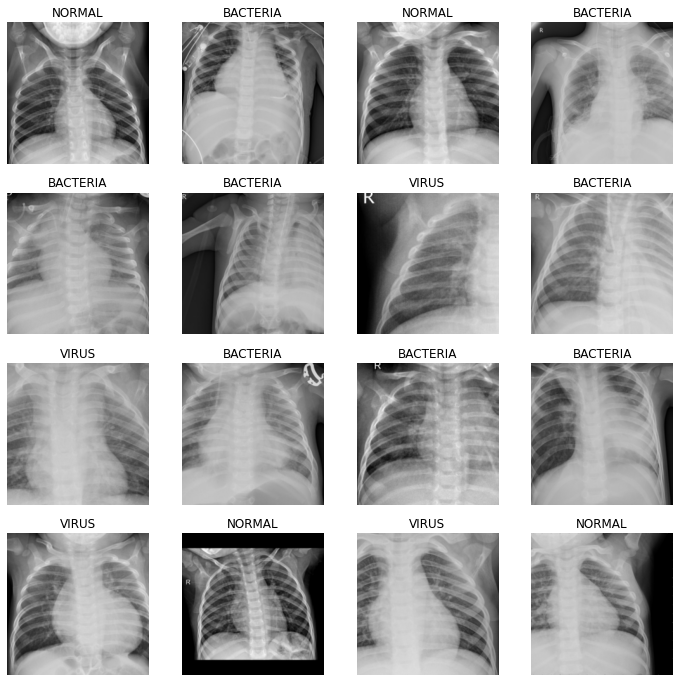

In [ ]:
dls.train.show_batch(max_n=16, nrows=4)

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.107376,0.659412,0.765337,01:39


epoch,train_loss,valid_loss,accuracy,time
0,0.666636,0.481834,0.819018,01:42
1,0.521872,0.448086,0.826687,01:42
2,0.454717,0.566996,0.797546,01:43
3,0.376451,0.497390,0.819785,01:42
4,0.297433,0.481642,0.819785,01:42
5,0.228439,0.482084,0.830521,01:42
6,0.138601,0.568232,0.825920,01:41
7,0.097365,0.589745,0.832055,01:42
8,0.068426,0.573222,0.836656,01:41
9,0.044170,0.571404,0.836656,01:41


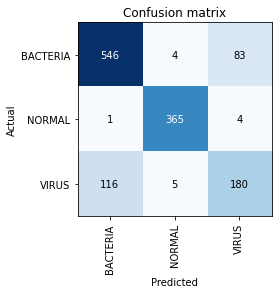

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
test_list = os.listdir('/content/test')

In [ ]:
def predict():
    for_sub = []
    for i in test_list:
        img = PILImage.create(f'/content/test/{i}')
        pred, pred_id, probs = learn.predict(img)
        if pred == 'BACTERIA':
            for_sub.append(1)
        if pred == 'VIRUS':
            for_sub.append(1)
        if pred == 'NORMAL':
            for_sub.append(0)
    return for_sub

for_sub = predict()

In [ ]:
len(for_sub)

624

In [ ]:
ss = pd.read_csv('/content/sample_solution.csv')
ss

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0
...,...,...
619,test_img_10620.jpeg,0
620,test_img_10621.jpeg,0
621,test_img_10622.jpeg,0
622,test_img_10623.jpeg,0


In [ ]:
ss['labels'] = for_sub

ss.to_csv("submission.csv", index=False)